<a href="https://colab.research.google.com/github/Fmarcelneves/Rental-price-analysis-and-forecast-Curitiba-PR/blob/main/Data_exploration_Curitiba_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install outlier-removal-101703289
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from outlier_removal.outlier import remove_outlier

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 6.5MB 18.4MB/s 
     |████████████████████████████████| 14.8MB 312kB/s 


In [ ]:
url = 'https://raw.githubusercontent.com/Fmarcelneves/Rental-price-analysis-and-forecast-Curitiba-PR/main/data_mercado_livre_ap_curitiba_rent.xls'
da_ml = pd.read_csv('dados_mercado_livre_ap_curitiba.csv')
#da_ml = pd.read_csv('dados_mercado_livre_curitiba.csv')

In [ ]:
da_ml = remove_outlier(da_ml)

/usr/local/lib/python3.6/dist-packages/outlier_removal/outlier.py:24: RuntimeWarning: invalid value encountered in greater
  return np.where((col > upper_bound) | (col < lower_bound))
/usr/local/lib/python3.6/dist-packages/outlier_removal/outlier.py:24: RuntimeWarning: invalid value encountered in less
  return np.where((col > upper_bound) | (col < lower_bound))


In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
da_ml.replace(',','.', regex=True,inplace=True)
da_ml['areas'] = da_ml['areas'].astype(float)

In [ ]:
da_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,649.00,1278.98,543.25,400.00,900.00,1150.00,1500.00,3100.00
quartos,641.00,2.03,0.80,1.00,1.00,2.00,3.00,4.00
areas,647.00,66.75,47.44,11.00,45.00,57.00,76.00,801.00


In [ ]:
filtro_precos = da_ml['precos'] < 800

In [ ]:
da_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 740
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bairro   649 non-null    object 
 1   precos   649 non-null    float64
 2   quartos  641 non-null    float64
 3   areas    647 non-null    float64
dtypes: float64(3), object(1)
memory usage: 25.4+ KB


In [ ]:
da_ml.isnull().sum()

bairro     0
precos     0
quartos    8
areas      2
dtype: int64

In [ ]:
da_ml['bairro'].value_counts()

Cidade Industrial      46
Centro                 46
Bigorrilho             43
Santa Quitéria         36
Santa Cândida          36
Cristo Rei             31
Mercês                 28
Novo Mundo             28
Vila Izabel            25
Pinheirinho            24
Cabral                 23
Juvevê                 21
Batel                  21
Uberaba                19
Bacacheri              18
Campo Comprido         17
Bairro Alto            16
Seminário              16
Xaxim                  16
Tingui                 14
Prado Velho            13
Abranches               9
Fazendinha              9
Atuba                   8
Guabirotuba             8
Pilarzinho              7
Hauer                   7
Jardim Social           7
Alto da Rua XV          6
Cachoeira               6
Mossunguê               5
Hugo Lange              4
Bom Retiro              4
Vista Alegre            4
Santo Inácio            4
Orleans                 4
Tatuquara               3
Santa Felicidade        3
Parolin     

In [ ]:
da_ml.groupby(['bairro']).median().sort_values('precos', ascending=False)

,precos,quartos,areas
bairro,,,
Campina do Siqueira,2200.00,2.00,70.00
Mossunguê,2000.00,3.00,79.00
Batel,1990.00,3.00,101.00
Hugo Lange,1950.00,3.00,81.00
Bigorrilho,1850.00,2.00,98.00
Vila Izabel,1590.00,3.00,77.00
Juvevê,1550.00,2.00,55.00
Atuba,1412.50,2.00,51.50
Orleans,1400.00,2.00,50.00


In [ ]:
da_group = da_ml.groupby(['bairro']).median().sort_values('precos', ascending=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

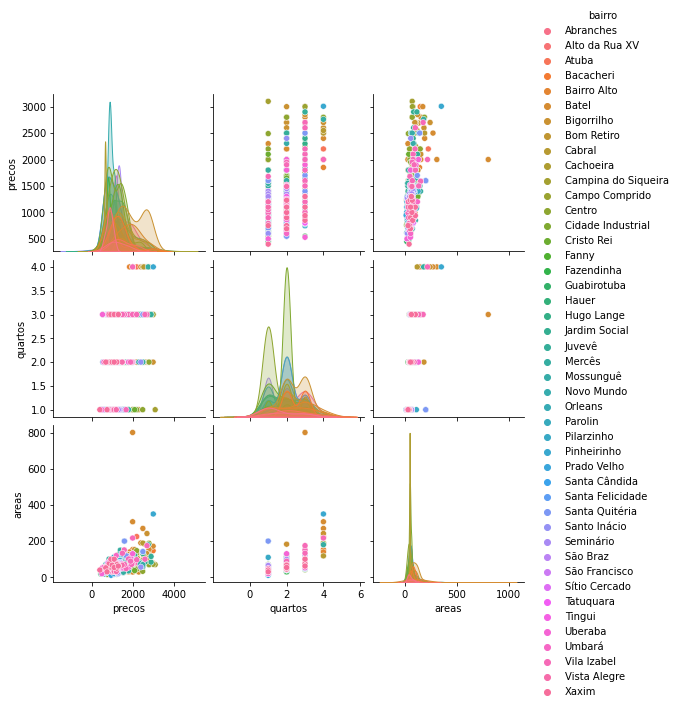

In [ ]:
sns.pairplot(da_ml, hue='bairro')

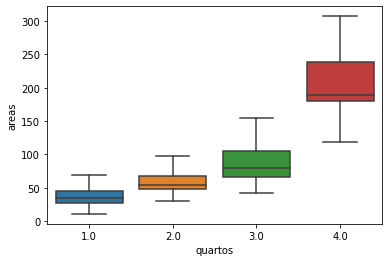

In [ ]:
sns.boxplot(x="quartos", y="areas", data=da_ml, showfliers = False);

Text(0.5, 1.0, 'Correlation')

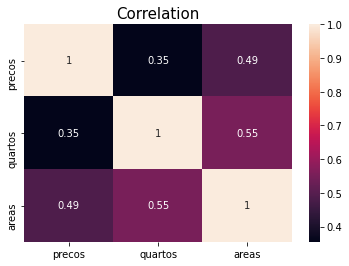

In [ ]:
corrMatrix = sns.heatmap(da_ml.corr(), annot=True);
corrMatrix.set_title('Correlation', fontsize=15)

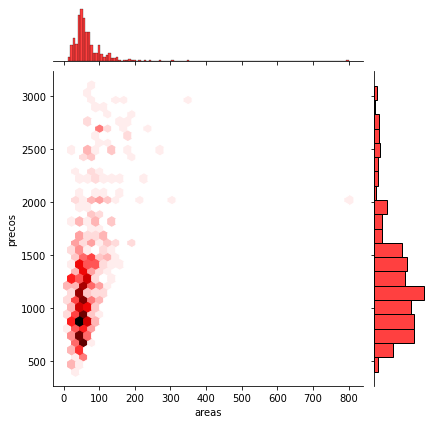

In [ ]:
sns.jointplot(x="areas", y="precos", data=da_ml, kind="hex", color="r");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


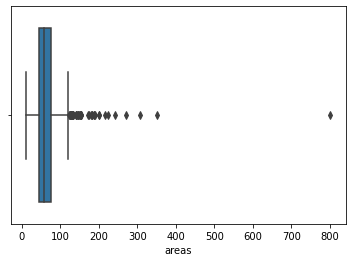

In [ ]:
sns.boxplot(da_ml['areas']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


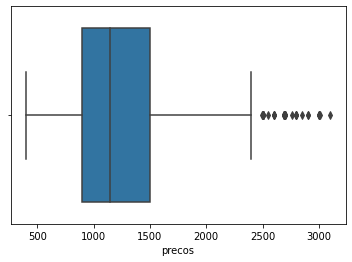

In [ ]:
sns.boxplot(da_ml['precos']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


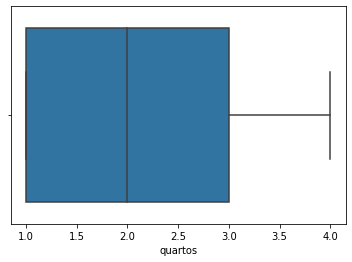

In [ ]:
sns.boxplot(da_ml['quartos']);

In [ ]:
da_group.head()

,precos,quartos,areas
bairro,,,
Campina do Siqueira,2200.00,2.00,70.00
Mossunguê,2000.00,3.00,79.00
Batel,1990.00,3.00,101.00
Hugo Lange,1950.00,3.00,81.00
Bigorrilho,1850.00,2.00,98.00


In [ ]:
da_price = da_group.drop('quartos', 1).drop('areas', 1).reset_index()

In [ ]:
da_price.head()

,bairro,precos
0,Campina do Siqueira,2200.00
1,Mossunguê,2000.00
2,Batel,1990.00
3,Hugo Lange,1950.00
4,Bigorrilho,1850.00


In [ ]:
da_price

,bairro,precos
0,Campina do Siqueira,2200.00
1,Mossunguê,2000.00
2,Batel,1990.00
3,Hugo Lange,1950.00
4,Bigorrilho,1850.00
5,Vila Izabel,1590.00
6,Juvevê,1550.00
7,Atuba,1412.50
8,Orleans,1400.00
9,Cabral,1400.00


In [ ]:
db = gpd.read_file('DIVISA_DE_BAIRROS.shp')

In [ ]:
db.head()

,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry
0,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7..."
1,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7..."
2,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7..."
3,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7..."
4,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7..."


In [ ]:
merged["NOME"].value_counts()

SEMINÁRIO                        1
CIDADE INDUSTRIAL DE CURITIBA    1
AHÚ                              1
NOVO MUNDO                       1
VILA IZABEL                      1
                                ..
BOA VISTA                        1
CAPÃO RASO                       1
CAMPO COMPRIDO                   1
CENTRO                           1
SANTA FELICIDADE                 1
Name: NOME, Length: 75, dtype: int64

In [ ]:
db['bairro'] = db['NOME'].str.capitalize()

In [ ]:
db.head()

,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,bairro
0,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",Água verde
1,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",Jardim social
2,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",Xaxim
3,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",Jardim das américas
4,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",Guaíra


In [ ]:
merged = db.set_index('bairro').join(da_price.set_index('bairro'))
merged = merged.reset_index()
#merged = merged.fillna(0)

In [ ]:
merged[""].value_counts()

In [ ]:
merged

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Água verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",nan
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",nan
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",970.00
3,Jardim das américas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",nan
4,Guaíra,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",nan
...,...,...,...,...,...,...,...,...,...,...,...,...
70,Vista alegre,69,31.00,DIVISA DE BAIRROS,VISTA ALEGRE,Decreto Municipal 774 / 1975,5.00,REGIONAL SANTA FELICIDADE,3698848.44,10150.09,"POLYGON ((670685.577 7190127.767, 670738.147 7...",nan
71,São braz,70,60.00,DIVISA DE BAIRROS,SÃO BRAZ,Decreto Municipal 774 / 1975,5.00,REGIONAL SANTA FELICIDADE,5060314.52,11698.61,"POLYGON ((666526.702 7189297.194, 666532.818 7...",nan
72,São joão,71,48.00,DIVISA DE BAIRROS,SÃO JOÃO,Decreto Municipal 774 / 1975,5.00,REGIONAL SANTA FELICIDADE,3036122.13,8110.40,"POLYGON ((670541.326 7191452.778, 670581.372 7...",nan
73,Cascatinha,74,47.00,DIVISA DE BAIRROS,CASCATINHA,Decreto Municipal 774 / 1975,5.00,REGIONAL SANTA FELICIDADE,2182141.59,8730.82,"POLYGON ((670467.226 7189102.620, 670469.130 7...",nan


In [ ]:
merged['precos'] = merged['precos'].fillna(merged.groupby('NM_REGIONA')['precos'].transform('median'))

In [ ]:
merged.head()

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Água verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",1068.33
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",1565.00
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",970.00
3,Jardim das américas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",957.50
4,Guaíra,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",1068.33


In [ ]:
 merged.groupby(['NM_REGIONA']).median().sort_values('precos', ascending=False)

,OBJECTID,CODIGO,CD_REGIONA,SHAPE_AREA,SHAPE_LEN,precos
NM_REGIONA,,,,,,
REGIONAL SANTA FELICIDADE,69.00,48.00,5.00,3512540.74,10446.54,1700.00
REGIONAL MATRIZ,23.50,10.50,1.00,1876561.14,6225.21,1475.00
REGIONAL BOA VISTA,48.50,49.50,4.00,4237817.97,11098.51,1114.00
REGIONAL PORTÃO,10.50,27.50,7.00,2284859.19,6949.10,1090.00
REGIONAL CAJURU,30.00,21.50,3.00,4014396.44,9308.81,957.50
REGIONAL PINHEIRINHO,28.00,41.00,8.00,5049840.13,11816.64,918.75
REGIONAL BOQUEIRÃO,34.00,56.50,2.00,10536322.74,16155.39,910.00
REGIONAL BAIRRO NOVO,51.00,72.00,10.00,11359302.45,22063.15,900.00
REGIONAL TATUQUARA,49.00,71.00,12.00,11234800.38,21895.61,700.00


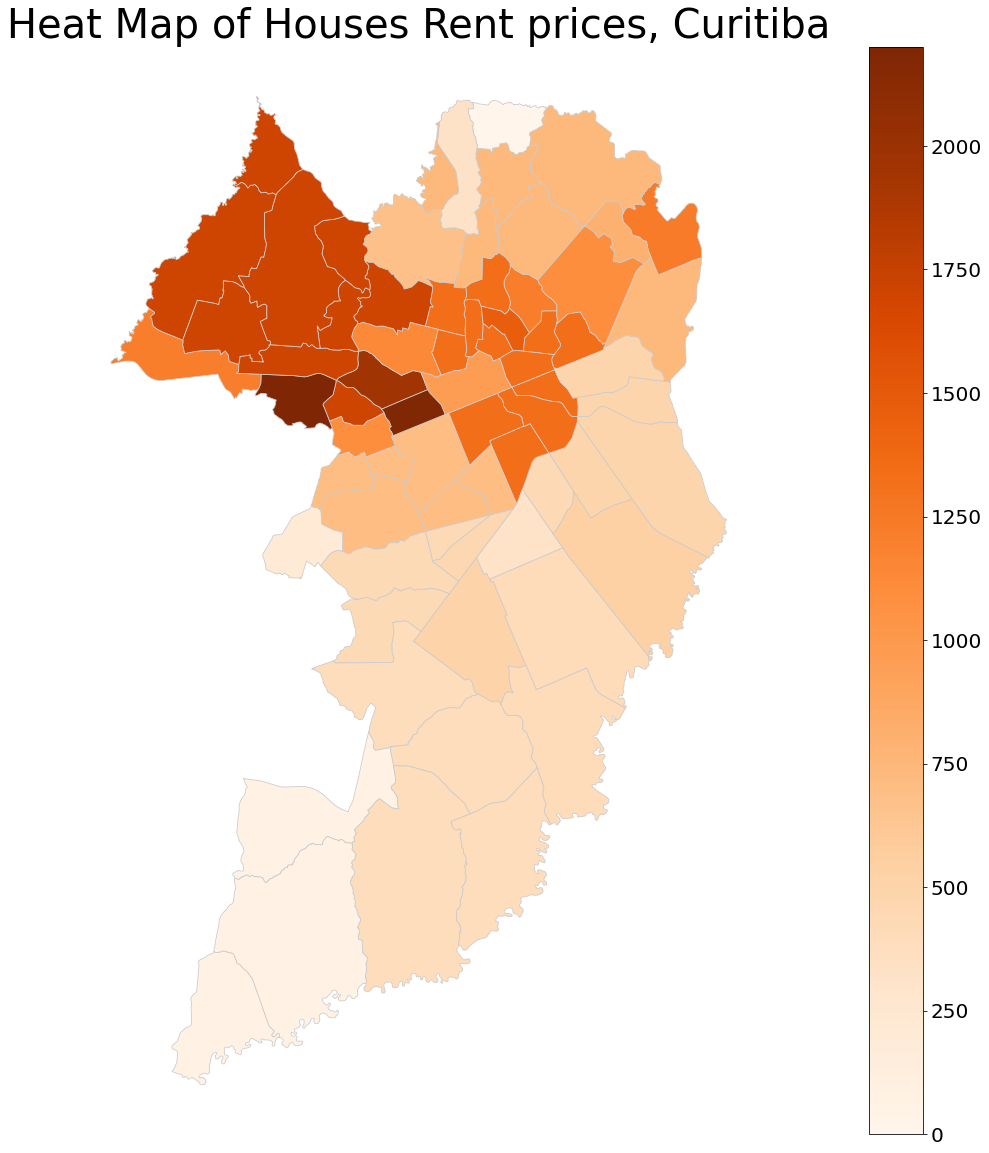

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Houses Rent prices, Curitiba', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 2200
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('precos', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

In [ ]:
merged.head()

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Água verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",1068.33
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",1565.00
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",970.00
3,Jardim das américas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",957.50
4,Guaíra,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",1068.33
